In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
delivery = pd.read_csv("fooddelivery.csv")
delivery.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


### Relationship between delivery ratings and delivery time 

In [3]:
ratings = delivery.groupby(['Delivery_person_Ratings'])['Time_taken(min)'].mean().to_frame()
ratings = ratings.sort_values(by=['Delivery_person_Ratings'], ascending=False)
ratings.head()

,Time_taken(min)
Delivery_person_Ratings,
6.0,23.943396
5.0,25.531281
4.9,24.123136
4.8,24.025602
4.7,24.170540


Text(0.5, 1.0, 'Delivery ratings vs Average delivery time')

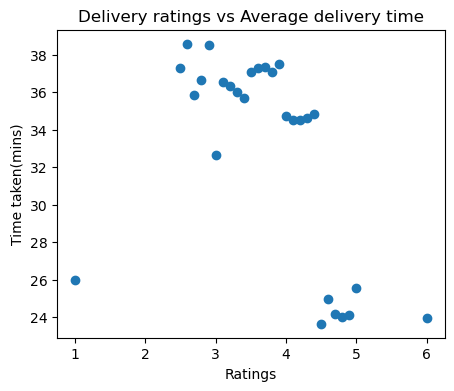

In [4]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(ratings.index, ratings["Time_taken(min)"])

ax.set_xlabel("Ratings")
ax.set_ylabel("Time taken(mins)")
ax.set_title("Delivery ratings vs Average delivery time")

#### It can be seen that delivery riders who are rewarded with high ratings between 5 - 6 took about less than 26 minutes to deliver, while riders who took more than half an hour to deliver are rewarded with ratings between 2.5 - 4.5. 

### Average delivery time taken by different vehicle types

In [5]:
vehicle = delivery.groupby(['Type_of_vehicle'])['Time_taken(min)'].mean().to_frame()
vehicle = vehicle.sort_values(by=['Time_taken(min)'], ascending=False)
vehicle.head()

,Time_taken(min)
Type_of_vehicle,
motorcycle,27.605674
bicycle,26.426471
scooter,24.480754
electric_scooter,24.470110


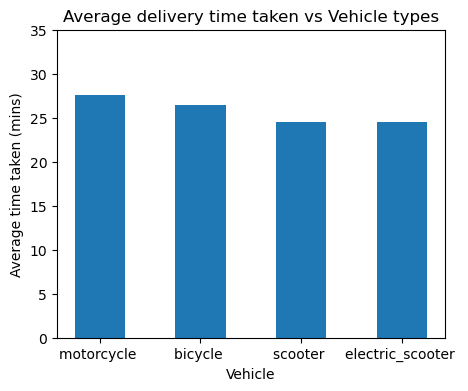

In [6]:
fig, ax = plt.subplots(figsize=(5,4))

ax.bar(x=vehicle.index,
       height=vehicle["Time_taken(min)"],
       width=0.5
)

ax.set_title("Average delivery time taken vs Vehicle types")
ax.set_xlabel("Vehicle")
ax.set_ylabel("Average time taken (mins)")
ax.set_ylim(0, 35)
plt.show()

#### Without considering the distance travelled, delivery riders who are using electric scooter or scooter (presumably for a shorter distance) have similarly the lowest average delivery time. 

### Number of orders based on type of order

In [7]:
orders = delivery.groupby(['Type_of_order']).size().to_frame(name='Number of Orders')
orders

,Number of Orders
Type_of_order,
Buffet,11280
Drinks,11322
Meal,11458
Snack,11533


Text(0.5, 1.0, 'Total orders based on type of order')

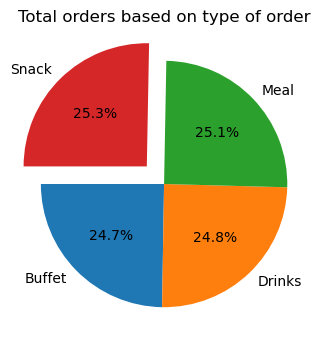

In [8]:
fig, ax = plt.subplots(figsize=(5,4))

ax.pie(x=orders["Number of Orders"],
       startangle=180,
       labels=["Buffet", "Drinks", "Meal", "Snack"], 
       autopct='%1.1f%%' ,
       explode=(0, 0, 0, .2)
      )


ax.set_title("Total orders based on type of order")

#### Snack was the most ordered delivery item